In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import xgboost as xgb

In [3]:
df=pd.read_csv('Real_Combine.csv')

In [4]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


<AxesSubplot:>

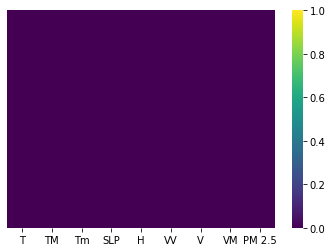

In [5]:
##Check for Null Values
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [6]:
df=df.dropna()

<AxesSubplot:>

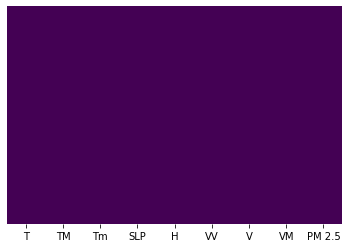

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
X=df.iloc[:,:-1] ##Independent Features
y=df.iloc[:,-1]  ##Dependent Features

In [9]:
##Check Null Values
X.isnull()

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [10]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1063    False
1064    False
1065    False
1066    False
1067    False
1068    False
1069    False
1070    False
1071    False
1072    False
1073    False
1074    False
1075    False
1076    False
1077    False
1078    False
1079    False
1080    False
1081    False
1082    False
1083    False
1084    False
1085    False
1086    False
1087    False
1088    False
1089    False
1090    False
1091    False
1092    False
Name: PM 2.5, Length: 1092, dtype: bool

In [11]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


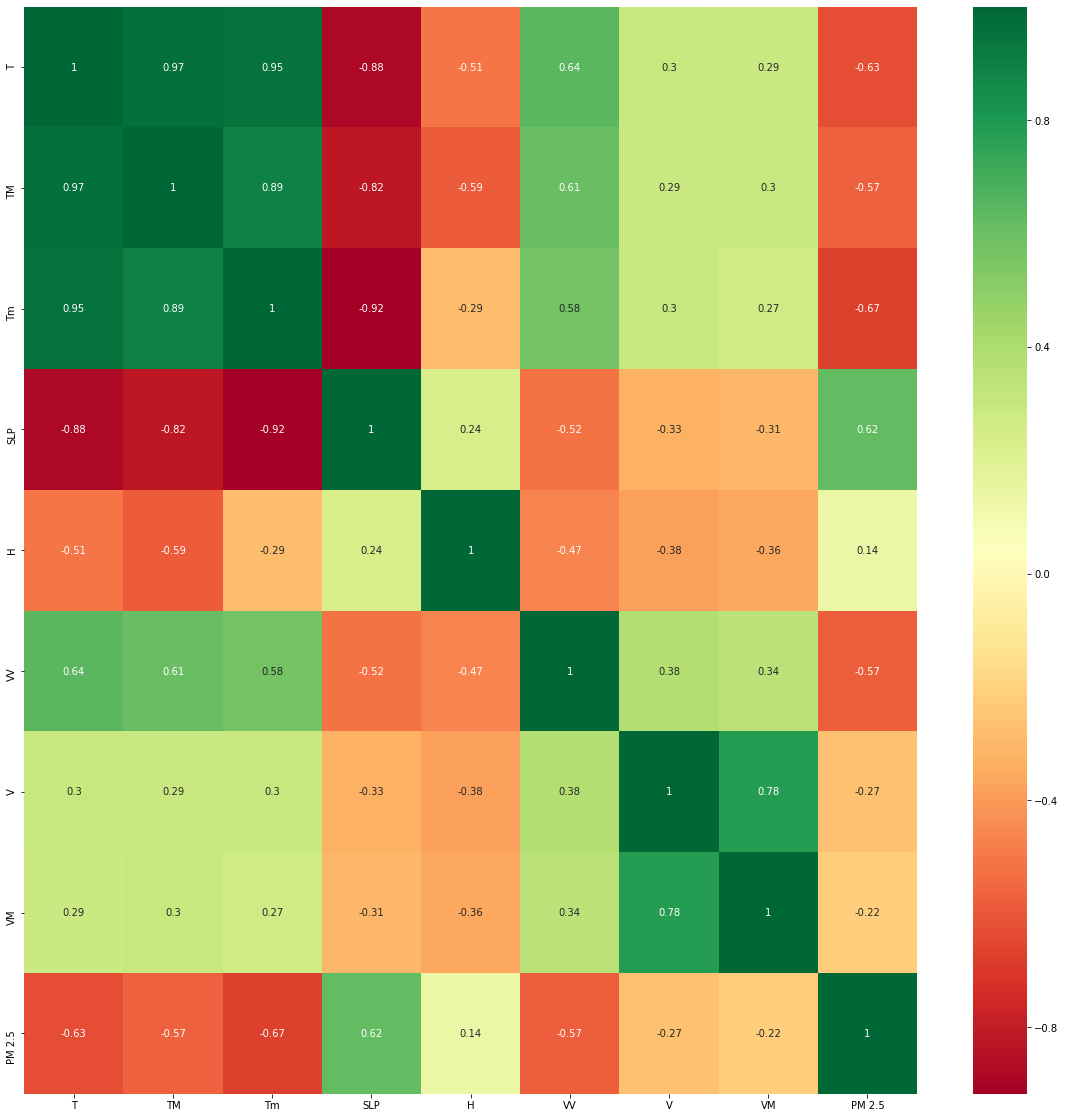

In [12]:
# Get Correlations of each feature in dataset
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#Plot Heat Map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
regressor=KNeighborsRegressor(n_neighbors=1)
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [17]:
print("Coefficient of Determination of R^2 on train set : {}".format(regressor.score(X_train,y_train)))

Coefficient of Determination of R^2 on train set : 1.0


In [18]:
print("Coefficient of Determination of R^2 on test set : {}".format(regressor.score(X_test,y_test)))

Coefficient of Determination of R^2 on test set : 0.5417545333477789


In [20]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [22]:
score.mean()

0.39387489016756577

## Model Evaluation

In [24]:
prediction=regressor.predict(X_test)

<AxesSubplot:xlabel='PM 2.5'>

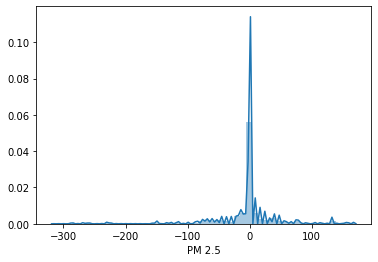

In [25]:
sns.distplot(y_test-prediction)

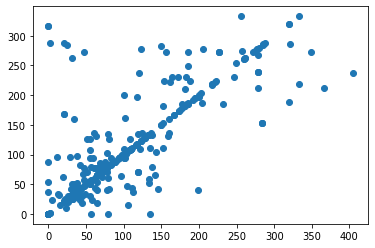

In [27]:
plt.scatter(y_test,prediction)

## HyperParameter Tunning

In [28]:
accuracy_rate=[]

#Will take Some time

for i in range(1,40):
    knn=KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10,scoring='neg_mean_squared_error')
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

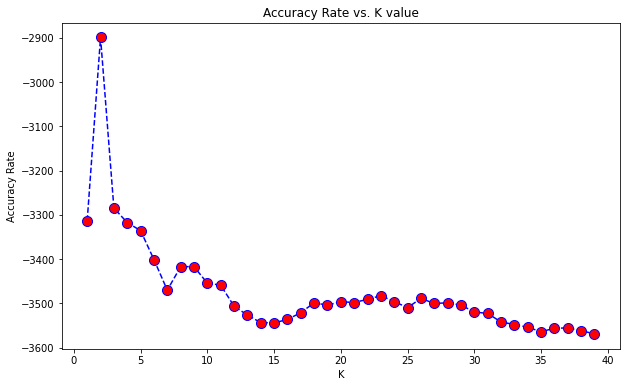

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Accuracy Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [30]:
## Choosing the value of k as 2

In [45]:
knn=KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)

<AxesSubplot:xlabel='PM 2.5'>

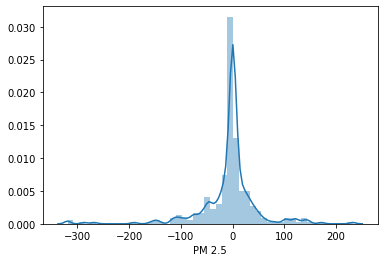

In [46]:
sns.distplot(y_test-predictions)

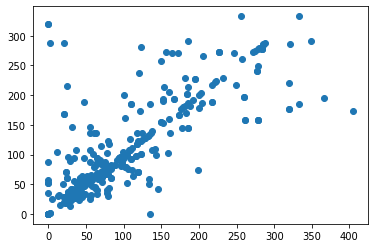

In [47]:
plt.scatter(y_test,predictions)

In [48]:
import sklearn.metrics as metrics
print('MAE :',metrics.mean_absolute_error(y_test,predictions))
print('MSE :',metrics.mean_squared_error(y_test,predictions))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE : 30.499942835365857
MSE : 3269.0729583624457
RMSE : 57.17580745702194
